In [20]:
from Preprocessing_module import *
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
sns.set()

In [2]:
df_original = pd.read_csv("panic_disorder_dataset_training.csv")
df_original

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0
99998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [3]:
module = preprocess_module()
df = module.preprocess("panic_disorder_dataset_training.csv")
df

,Symptoms_Dizziness,Symptoms_Fear of losing control,Symptoms_Panic attacks,Symptoms_Shortness of breath,Medical History_Diabetes,Medical History_Heart disease,Psychiatric History_Bipolar disorder,Psychiatric History_Depressive disorder,Substance Use_Drugs,Coping Mechanisms_Meditation,...,Age,Gender,Family History,Personal History,Current Stressors,Severity,Impact on Life,Demographics,Social Support,Panic Disorder Diagnosis
0,0,0,0,1,1,0,1,0,0,0,...,38,0,0,1,1,0,0,0,2,0
1,0,0,1,0,0,0,0,0,1,0,...,51,0,0,0,2,0,0,1,2,0
2,0,0,1,0,1,0,0,1,0,0,...,32,1,1,0,2,0,2,1,1,0
3,0,0,0,0,1,0,1,0,0,1,...,64,1,0,0,1,1,1,0,2,0
4,0,0,1,0,0,0,1,0,1,0,...,31,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,1,1,0,0,0,...,22,0,1,0,2,0,0,0,0,0
99996,0,0,1,0,0,1,0,1,0,1,...,57,1,0,1,0,2,0,0,2,0
99997,0,0,1,0,0,1,1,0,0,0,...,20,0,1,0,1,2,1,0,0,0
99998,0,0,0,0,1,0,0,0,1,0,...,56,1,1,1,2,2,0,0,2,1


In [4]:
df["Panic Disorder Diagnosis"].value_counts()

Panic Disorder Diagnosis
0    95715
1     4285
Name: count, dtype: int64

In [5]:
x_balanced,x_test,y_balanced,y_test = module.balance(df,0.5,7)

In [6]:
y_balanced.value_counts()

Panic Disorder Diagnosis
0    53303
1    38286
Name: count, dtype: int64

### Matríz de Correlación

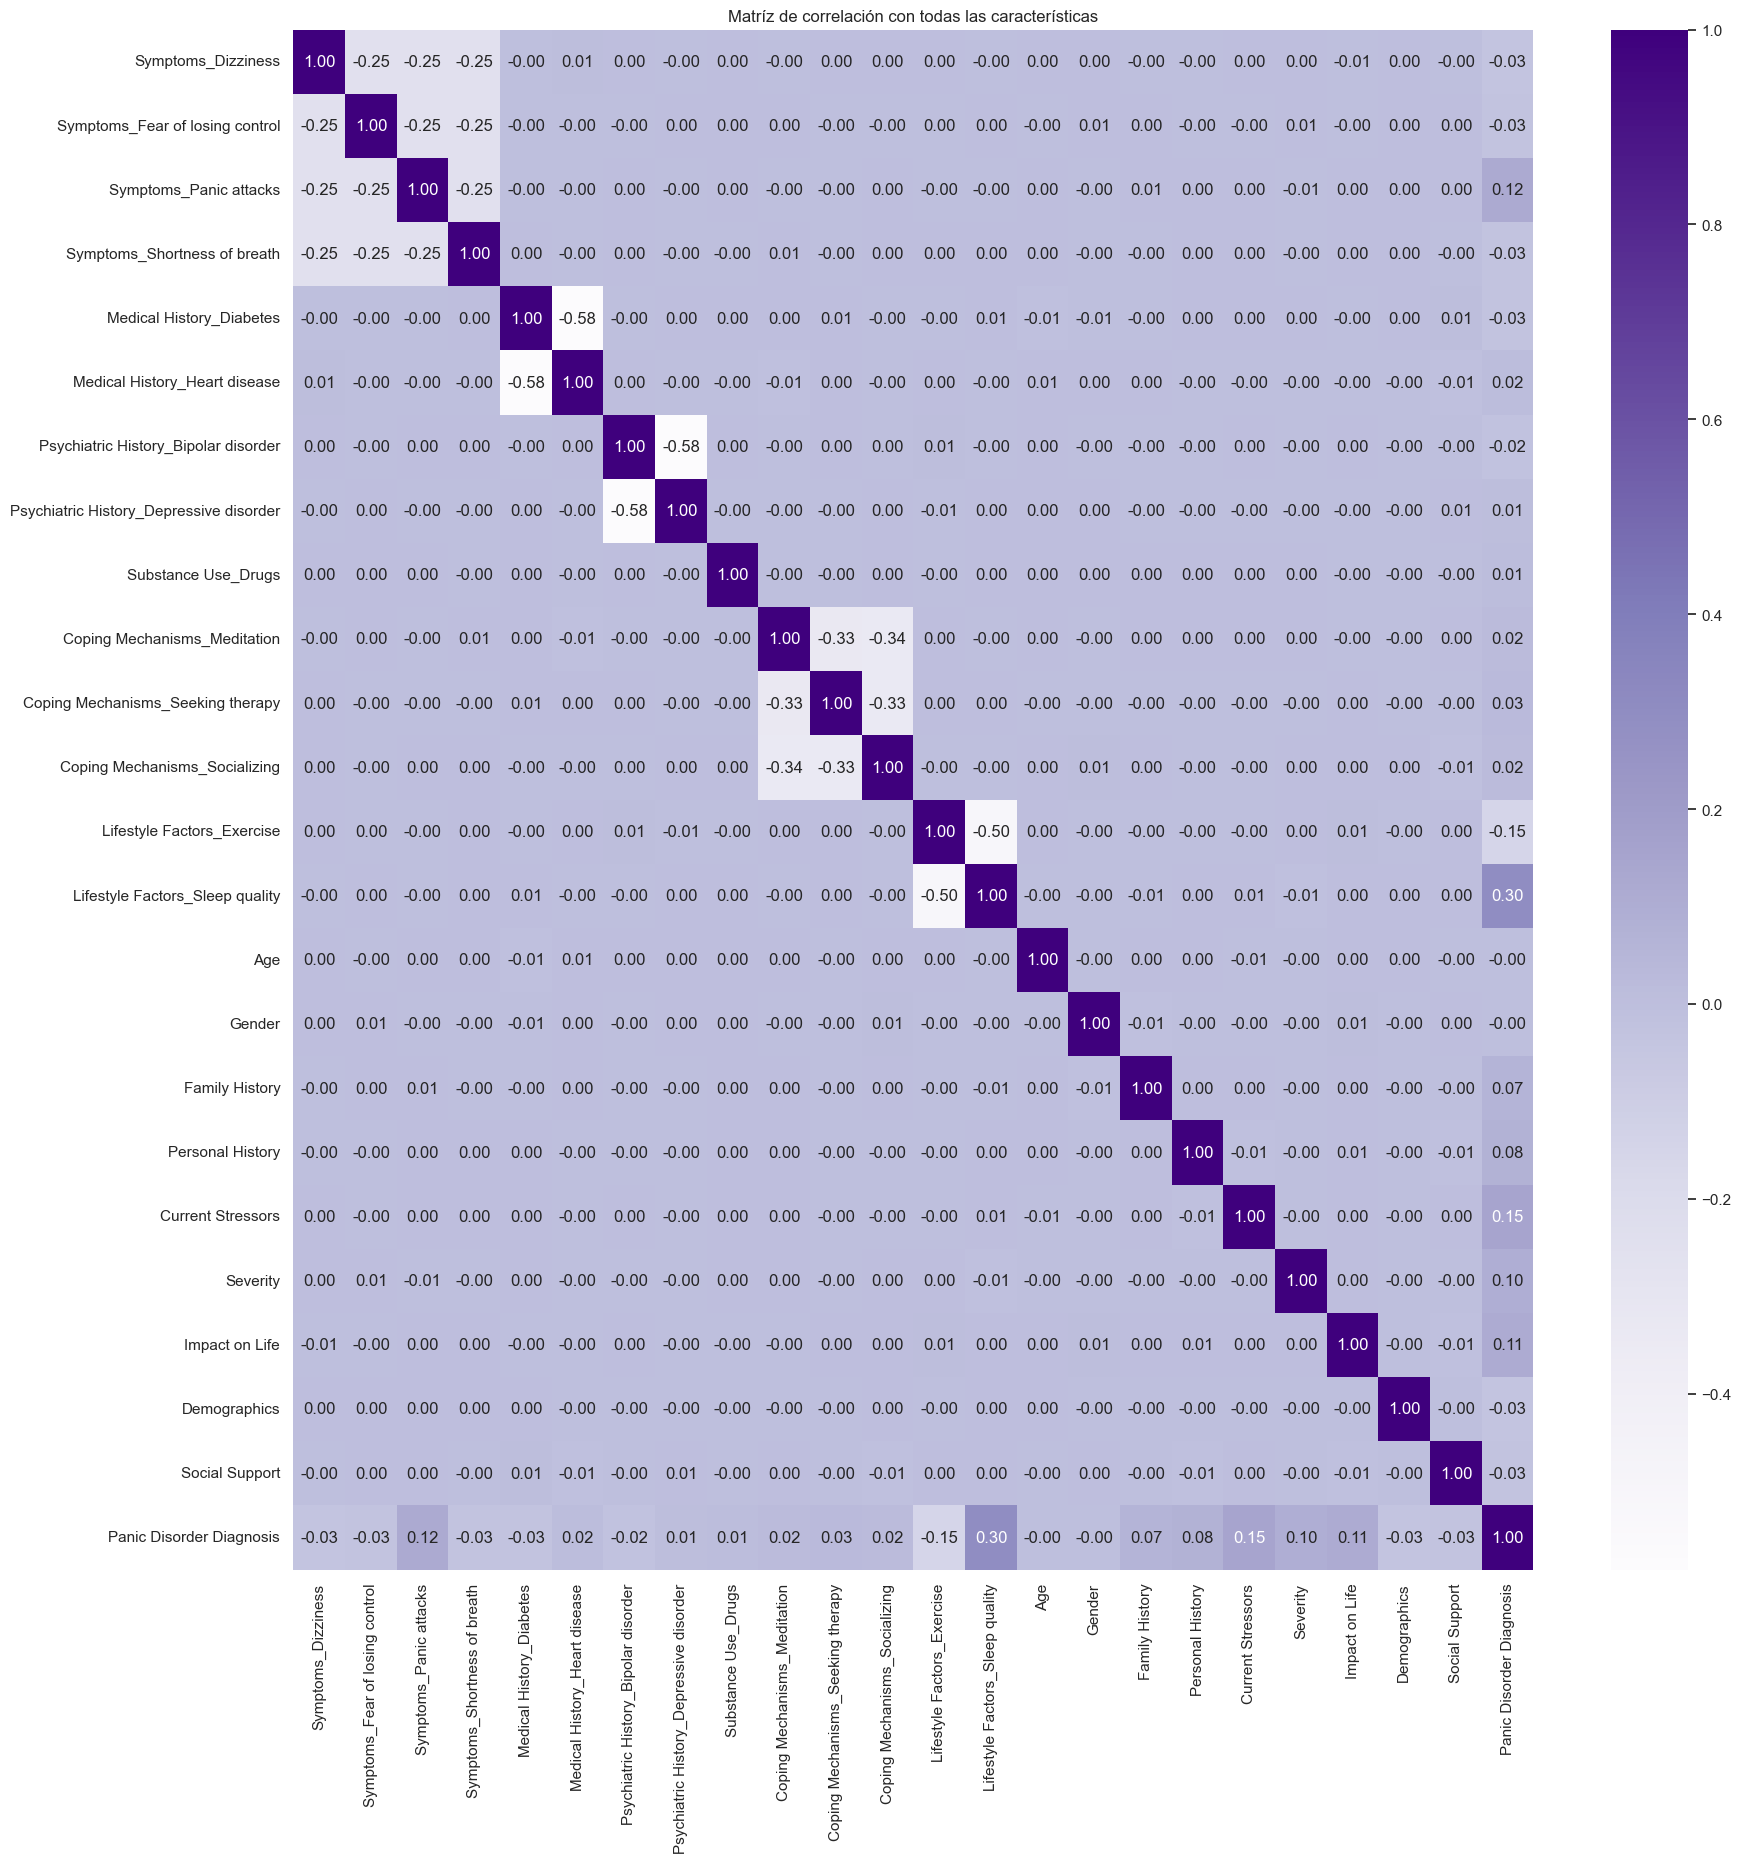

In [7]:
cm = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot = True, fmt=".2f", cmap="Purples", cbar=True)
plt.title("Matríz de correlación con todas las características")
plt.show()

## Primero Modelo de clasificación con Random Forest
Todas las características y sólo variando el número de árboles

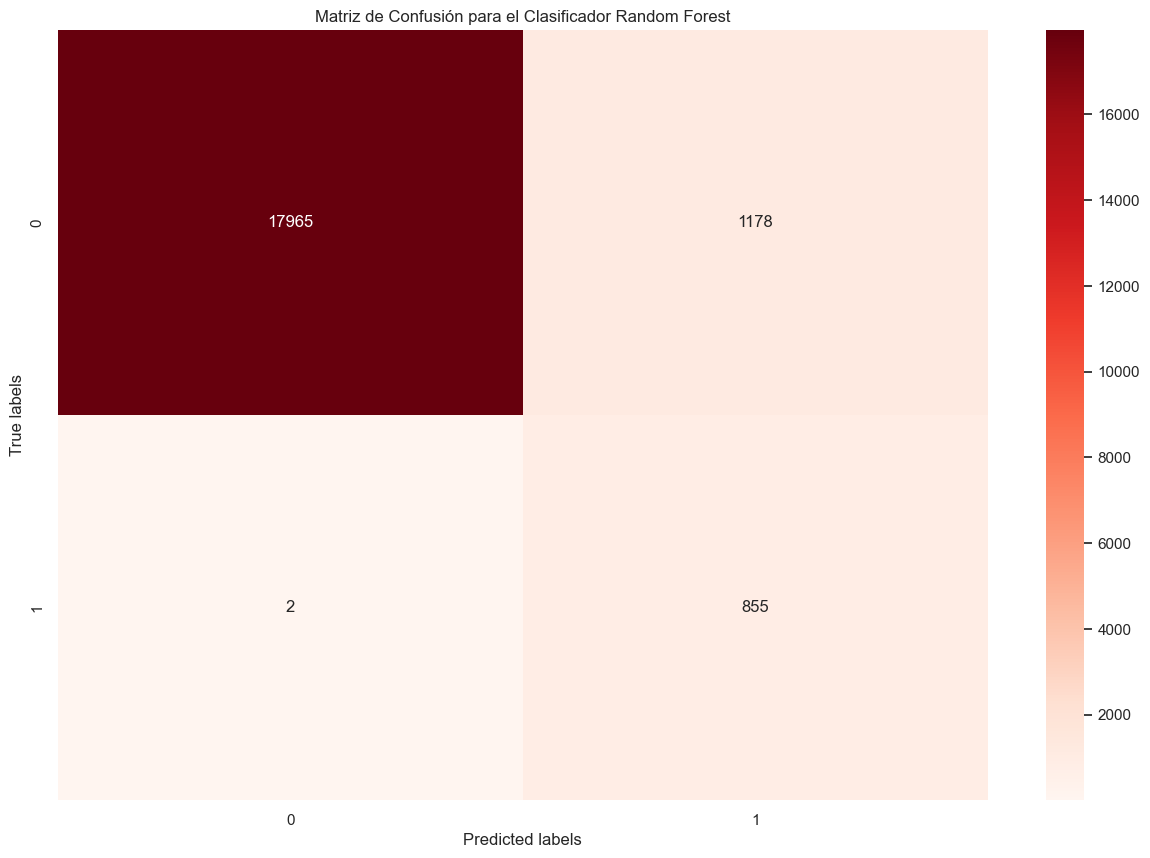

In [8]:
modelo_1 = RandomForestClassifier(random_state=42, n_estimators=283)
modelo_1.fit(x_balanced,y_balanced)
y_pred = modelo_1.predict(x_test)
cm_1 = confusion_matrix(y_test, y_pred)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Reds", xticklabels=y_balanced.unique(), yticklabels=y_balanced.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador Random Forest')
plt.show()

In [9]:
valores = ["0","1"]
print("Evaluando el modelo con un reporte de clasifiación se obtiene lo siguiente:")
print("\n")
print(classification_report(y_test, y_pred, target_names=valores))

Evaluando el modelo con un reporte de clasifiación se obtiene lo siguiente:


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19143
           1       0.42      1.00      0.59       857

    accuracy                           0.94     20000
   macro avg       0.71      0.97      0.78     20000
weighted avg       0.98      0.94      0.95     20000



### Feature Engineering

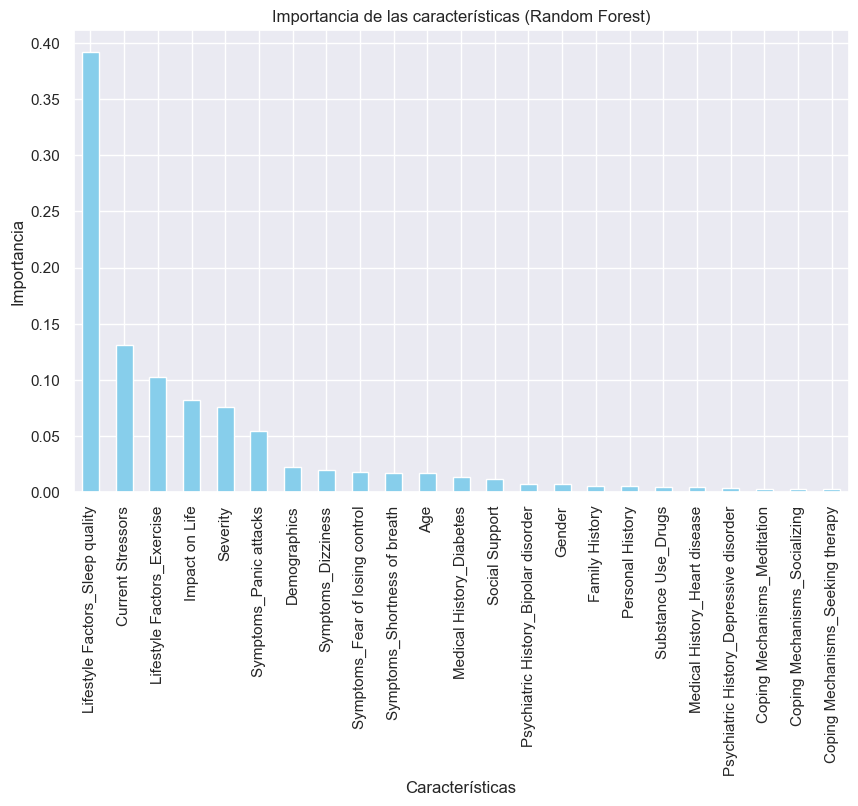

In [10]:
feature_importances = pd.Series(modelo_1.feature_importances_, index=x_balanced.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Importancia de las características (Random Forest)')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

In [11]:
x_balanced.columns

Index(['Symptoms_Dizziness', 'Symptoms_Fear of losing control',
       'Symptoms_Panic attacks', 'Symptoms_Shortness of breath',
       'Medical History_Diabetes', 'Medical History_Heart disease',
       'Psychiatric History_Bipolar disorder',
       'Psychiatric History_Depressive disorder', 'Substance Use_Drugs',
       'Coping Mechanisms_Meditation', 'Coping Mechanisms_Seeking therapy',
       'Coping Mechanisms_Socializing', 'Lifestyle Factors_Exercise',
       'Lifestyle Factors_Sleep quality', 'Age', 'Gender', 'Family History',
       'Personal History', 'Current Stressors', 'Severity', 'Impact on Life',
       'Demographics', 'Social Support'],
      dtype='object')

In [12]:
quitar = ["Gender","Family History","Personal History","Substance Use_Drugs",
         "Medical History_Heart disease","Psychiatric History_Depressive disorder",
         "Coping Mechanisms_Meditation","Coping Mechanisms_Socializing","Coping Mechanisms_Seeking therapy"]
x_2 = x_balanced.drop(quitar,axis=1)
x_2

,Symptoms_Dizziness,Symptoms_Fear of losing control,Symptoms_Panic attacks,Symptoms_Shortness of breath,Medical History_Diabetes,Psychiatric History_Bipolar disorder,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age,Current Stressors,Severity,Impact on Life,Demographics,Social Support
0,0,0,0,1,0,1,0,0,49,0,2,0,1,2
1,0,0,0,0,1,0,0,0,21,0,2,1,1,1
2,1,0,0,0,0,1,0,0,61,1,0,2,1,0
3,0,1,0,0,0,1,0,0,31,1,1,1,0,1
4,0,1,0,0,0,1,1,0,31,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91584,0,0,0,0,1,0,0,1,26,2,2,2,1,0
91585,0,0,0,0,1,0,0,1,33,2,2,0,1,0
91586,0,0,1,0,0,0,0,1,27,0,2,1,0,2
91587,0,0,0,0,1,1,0,1,65,2,2,1,0,0


#### Modelo Random Forest II
Nos deshacemos de características inecesarias y movemos parámetros

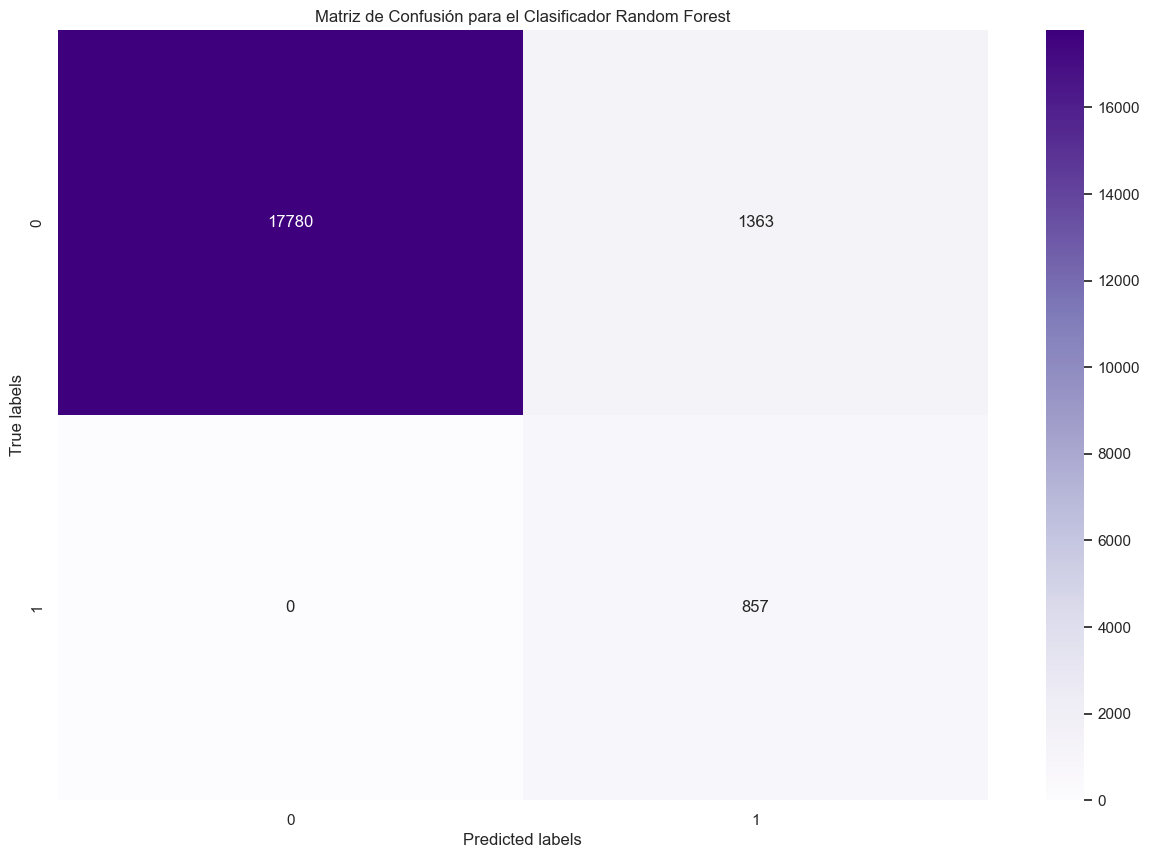

Evaluando el modelo con un reporte de clasifiación se obtiene lo siguiente:


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     19143
           1       0.39      1.00      0.56       857

    accuracy                           0.93     20000
   macro avg       0.69      0.96      0.76     20000
weighted avg       0.97      0.93      0.95     20000



In [13]:
modelo_2 = RandomForestClassifier(n_estimators = 283, random_state = 42, 
                                  min_samples_split = 25,
                                  min_samples_leaf = 25,
                                  max_depth = 30,
                                  criterion = "entropy")
modelo_2.fit(x_balanced,y_balanced)
y_pred_2 = modelo_2.predict(x_test)
cm_2 = confusion_matrix(y_test, y_pred_2)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Purples", xticklabels=y_balanced.unique(), yticklabels=y_balanced.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador Random Forest')
plt.show()
print("Evaluando el modelo con un reporte de clasifiación se obtiene lo siguiente:")
print("\n")
print(classification_report(y_test, y_pred_2, target_names=valores))

### Curva ROC (Precision-Recall)

<IPython.core.display.Javascript object>


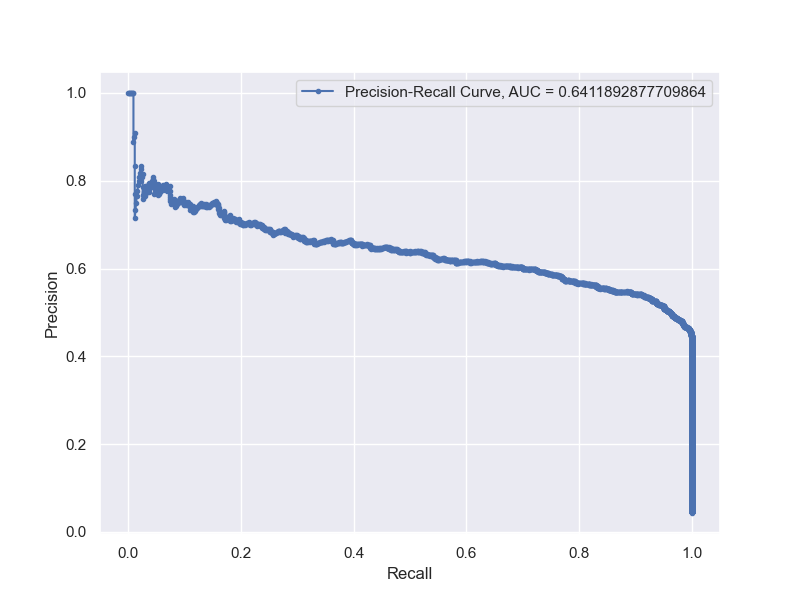

In [22]:
y_probs = modelo_2.predict_proba(x_test)[:,1]
precision, recall,_ = precision_recall_curve(y_test,y_probs)
pr_auc = auc(recall,precision)
plt.figure(figsize=(8,6))
plt.plot(recall,precision, marker=".",label="Precision-Recall Curve, AUC = {}".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [ ]:
y_probs = modelo_2.predict_proba(x_test)[:,1]
precision, recall,_ = precision_recall_curve(y_test,y_probs)
pr_auc = auc(recall,precision)
plt.figure(figsize=(8,6))
plt.plot(recall,precision, marker=".",label="Precision-Recall Curve, AUC = {}".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

### Modelo knn

In [15]:
#Estandarizamos la columna de edad
scaler = StandardScaler()
x_balanced["Age"] = scaler.fit_transform(x_balanced["Age"].values.reshape(-1, 1))
x_test["Age"] = scaler.fit_transform(x_test["Age"].values.reshape(-1, 1))

x_balanced

,Symptoms_Dizziness,Symptoms_Fear of losing control,Symptoms_Panic attacks,Symptoms_Shortness of breath,Medical History_Diabetes,Medical History_Heart disease,Psychiatric History_Bipolar disorder,Psychiatric History_Depressive disorder,Substance Use_Drugs,Coping Mechanisms_Meditation,...,Lifestyle Factors_Sleep quality,Age,Gender,Family History,Personal History,Current Stressors,Severity,Impact on Life,Demographics,Social Support
0,0,0,0,1,0,1,1,0,0,0,...,0,0.554684,0,1,0,0,2,0,1,2
1,0,0,0,0,1,0,0,1,1,0,...,0,-1.466634,1,1,0,0,2,1,1,1
2,1,0,0,0,0,0,1,0,1,0,...,0,1.420963,0,1,0,1,0,2,1,0
3,0,1,0,0,0,1,1,0,0,1,...,0,-0.744735,1,0,1,1,1,1,0,1
4,0,1,0,0,0,1,1,0,0,0,...,0,-0.744735,0,0,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91584,0,0,0,0,1,0,0,0,0,0,...,1,-1.105684,1,0,1,2,2,2,1,0
91585,0,0,0,0,1,0,0,0,0,0,...,1,-0.600355,1,1,0,2,2,0,1,0
91586,0,0,1,0,0,0,0,1,0,0,...,1,-1.033494,0,1,1,0,2,1,0,2
91587,0,0,0,0,1,0,1,0,0,0,...,1,1.709722,0,0,1,2,2,1,0,0


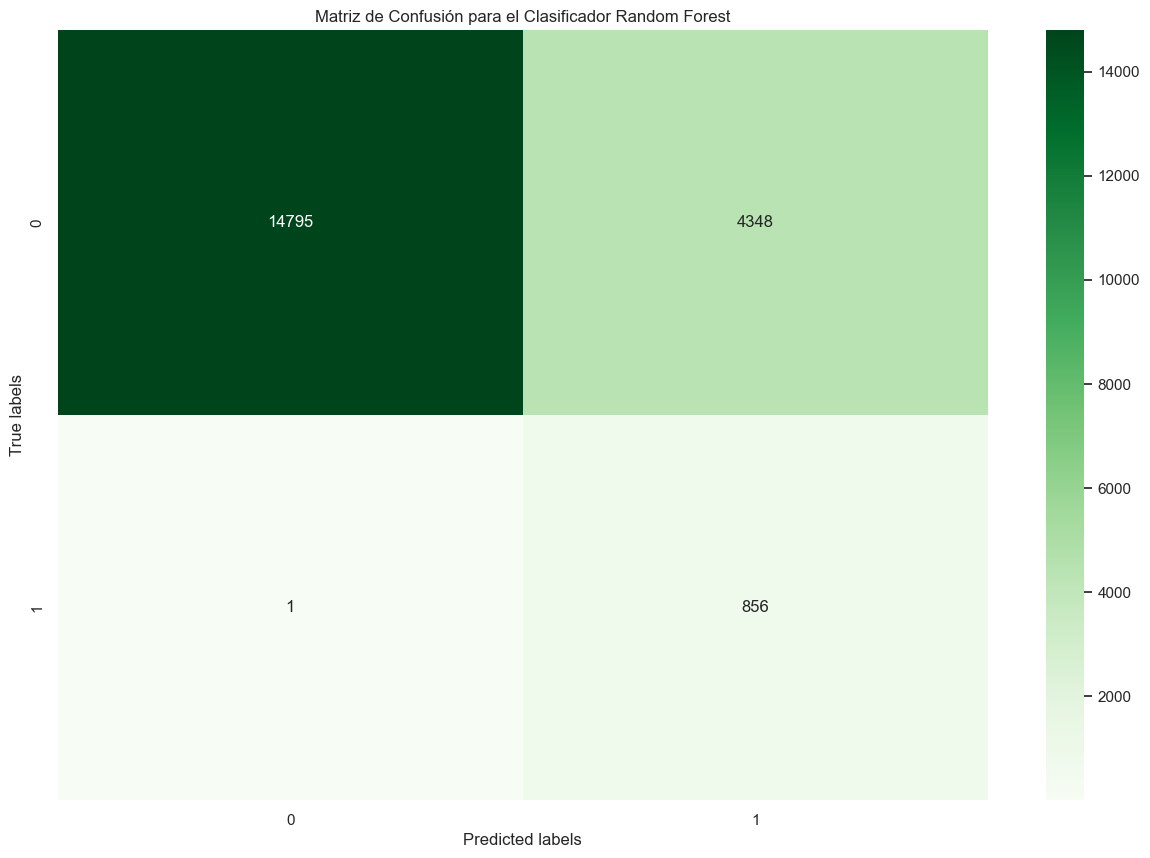

Evaluando el modelo con un reporte de clasifiación se obtiene lo siguiente:


              precision    recall  f1-score   support

           0       1.00      0.77      0.87     19143
           1       0.16      1.00      0.28       857

    accuracy                           0.78     20000
   macro avg       0.58      0.89      0.58     20000
weighted avg       0.96      0.78      0.85     20000



In [16]:
modelo_1_knn = KNeighborsClassifier(400)
modelo_1_knn.fit(x_balanced,y_balanced)
y_pred_1_knn = modelo_1_knn.predict(x_test)
cm_1_knn = confusion_matrix(y_test, y_pred_1_knn)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_1_knn, annot=True, fmt="d", cmap="Greens", xticklabels=y_balanced.unique(), yticklabels=y_balanced.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador Random Forest')
plt.show()
print("Evaluando el modelo con un reporte de clasifiación se obtiene lo siguiente:")
print("\n")
print(classification_report(y_test, y_pred_1_knn, target_names=["0","1"]))

### Hacemos PCA para visualizar scatter y determinar modelo svm

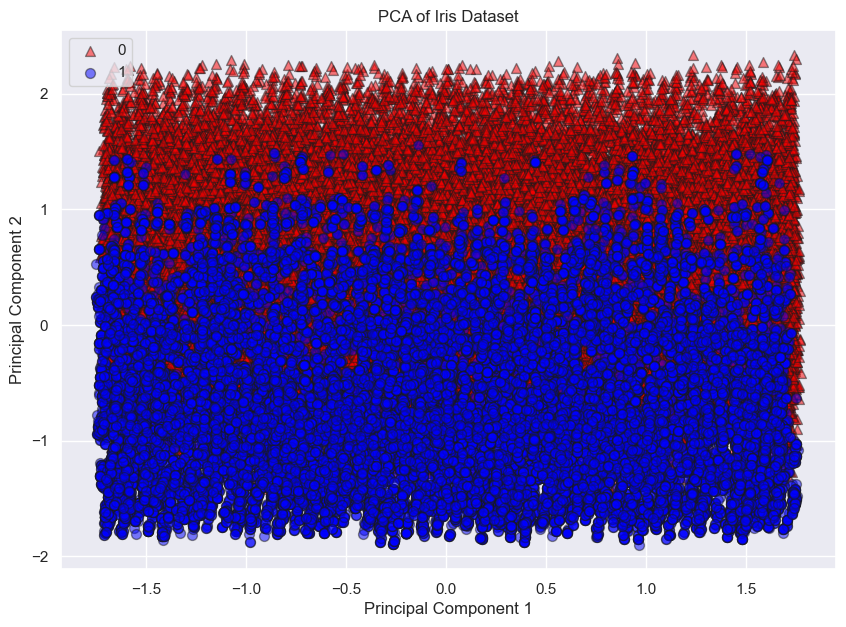

In [17]:
pca = PCA(n_components=2)  # Reducir a dos dimensiones
principal_components = pca.fit_transform(x_balanced)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = y_balanced
colors = ['red', 'blue']
target_names = ["0","1"]
markers = ['^', 'o']
plt.figure(figsize=(10, 7))
for color, target, target_name, marker in zip(colors, [0, 1], target_names, markers):
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, s=50,
                label=target_name, marker=marker, edgecolors='k', alpha = 0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


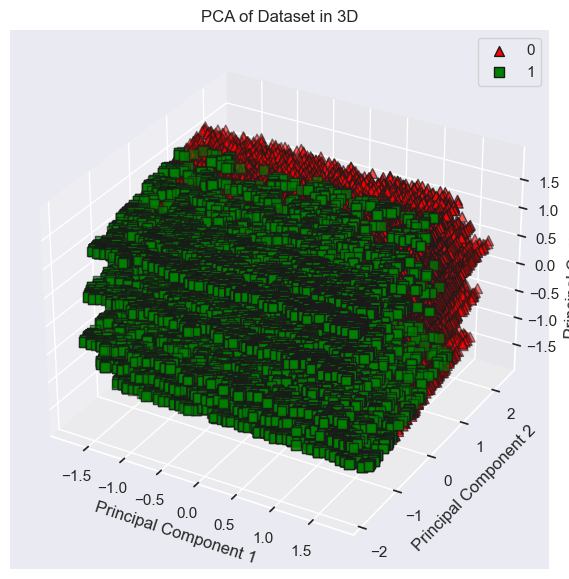

In [18]:
# Aplicar PCA
pca = PCA(n_components=3)  # Reducir a tres dimensiones
principal_components = pca.fit_transform(x_balanced)
# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Target'] = y_balanced
# Visualización en 3D
colors = ['red', 'green']
target_names = ["0", "1"]
markers = ['^', 's']
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for color, target, target_name, marker in zip(colors, [0, 1], target_names, markers):
    indices = pca_df['Target'] == target
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'], c=color, s=50,
               label=target_name, marker=marker, edgecolors='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Dataset in 3D')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


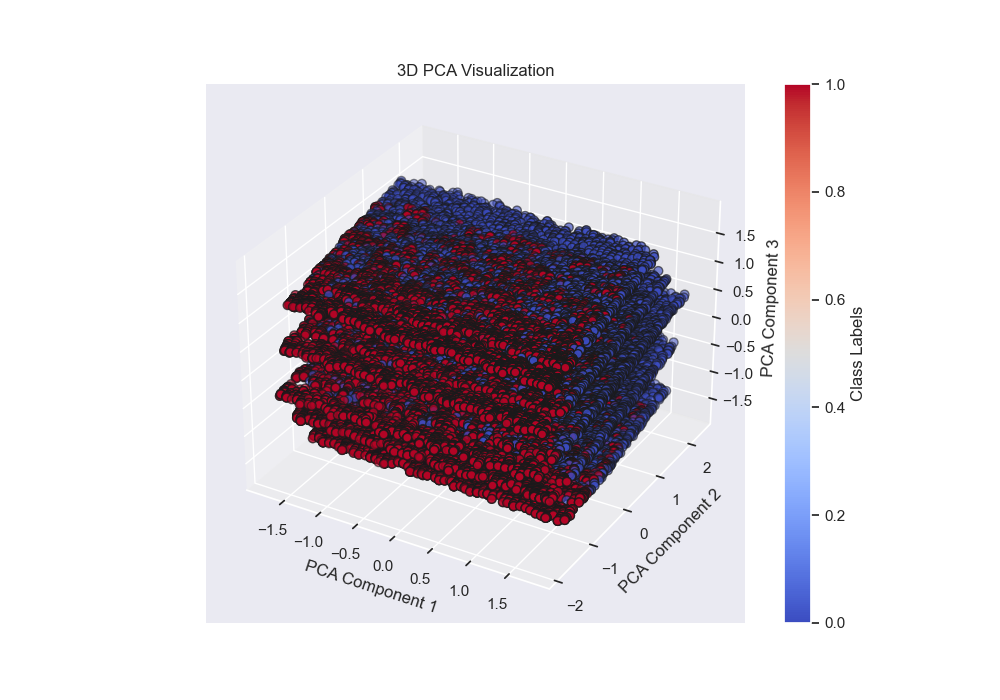

In [19]:
%matplotlib notebook
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(x_balanced)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_balanced, cmap="coolwarm", edgecolor="k", s=40)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization")
plt.colorbar(sc, ax=ax, label="Class Labels")
plt.show()